In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [40]:
data= pd.read_csv(r"C:\Users\subra\Downloads\Crop_recommendation.csv")
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [42]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

In [43]:
data.shape

(2200, 8)

In [44]:
##data['no']

In [45]:
data['label']=LabelEncoder().fit_transform(data['label'])
data['label'].unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

In [46]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [47]:
data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label            int32
dtype: object

In [48]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

                                             VISUALIZATION

1]Nitrogen

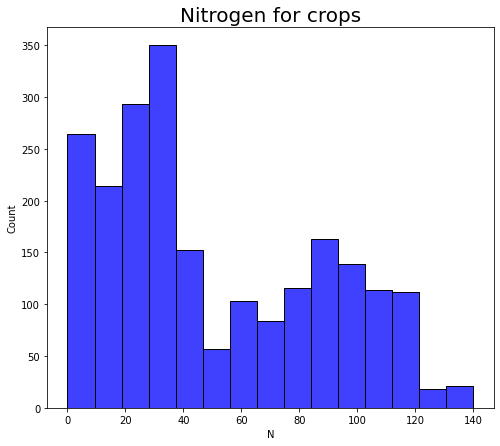

In [50]:
plt.figure(figsize=(8,7))
sns.histplot(x='N',data=data,color='b');
plt.title("Nitrogen for crops",{'fontsize':20});

2]Potassium

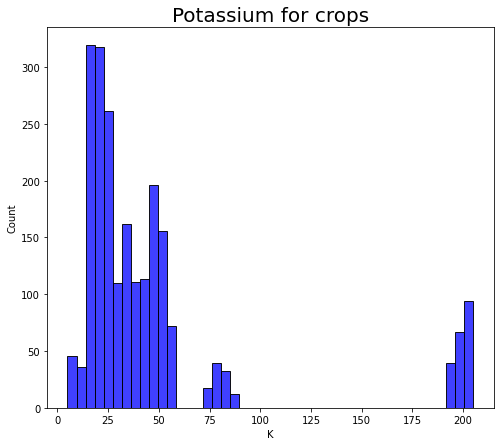

In [52]:
plt.figure(figsize=(8,7))
sns.histplot(x='K',data=data,color='b');
plt.title("Potassium for crops",{'fontsize':20});

3]Phosphorus

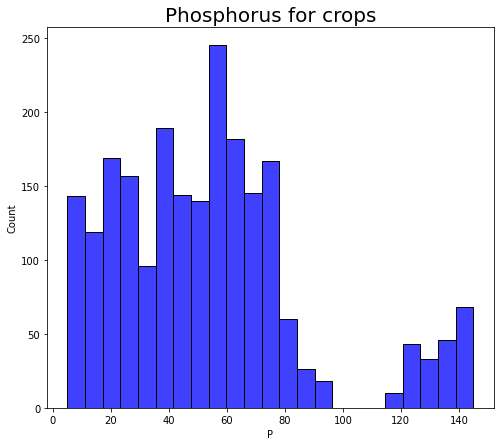

In [53]:
plt.figure(figsize=(8,7))
sns.histplot(x='P',data=data,color='b');
plt.title("Phosphorus for crops",{'fontsize':20});

4]Temperature

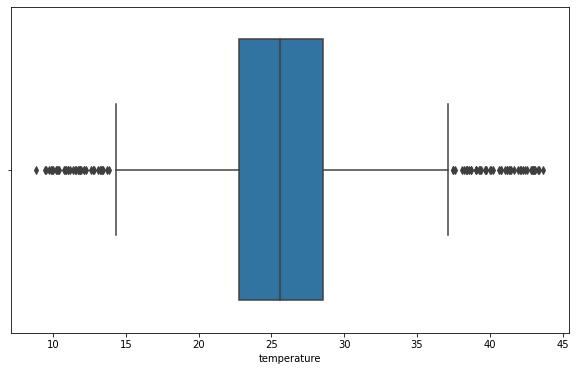

In [55]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data.temperature);

5]Humidity

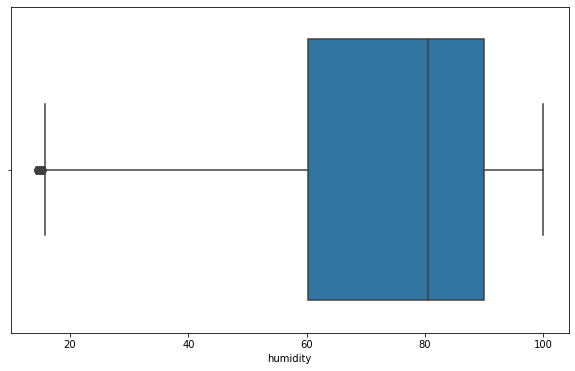

In [56]:
plt.figure(figsize=(10,6))
sns.boxplot(x=data.humidity);

6]PH

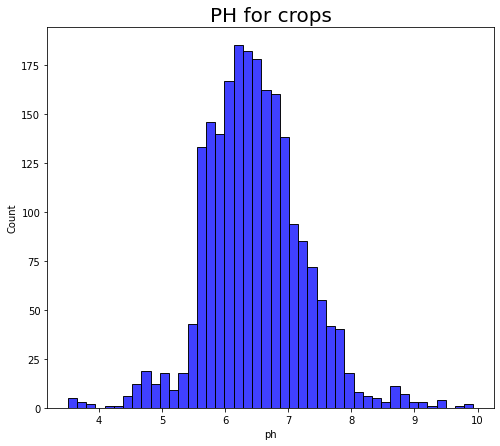

In [57]:
plt.figure(figsize=(8,7))
sns.histplot(x='ph',data=data,color='b');
plt.title("PH for crops",{'fontsize':20});

7]Rainfall

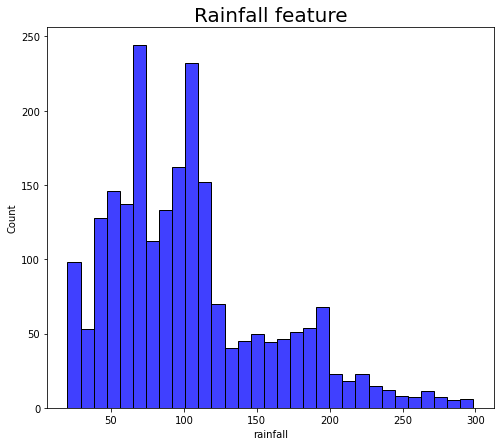

In [59]:
plt.figure(figsize=(8,7))
sns.histplot(x='rainfall',data=data,color='b');
plt.title("Rainfall feature",{'fontsize':20});

                                        DATA MODEL

In [ ]:
X = data.drop(['label'],axis=1)
y = data.label

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [64]:
X_train.to_csv(r"C:\Users\subra\Downloads\check2.csv")

In [65]:
y_train.to_csv(r"C:\Users\subra\Downloads\check3.csv")

In [ ]:
y_train.to_csv(r"C:\Users\subra\Downloads\check2.csv")

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
display(classifier.score(X_test,y_test))

0.975